In [1]:
# Importing necessary libraries
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier  
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## Exploratory Data Analysis

### Overview of the Dataset

In [2]:
# Read data from the cleaned .csv file with new variables added, which is an updated version of the original .csv file.
df = pd.read_csv('cleaned_retractions35215_V10.csv')

# Get the retractions with the most serous level
df = df[df['LevelOfSeriousness'] == "The most serious"]
df.iloc[:,:12].head()

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,ArticleType,RetractionDate,OriginalPaperDate,Reason
0,50792,A fractional order nonlinear model of the love...,(B/T) Data Science;(PHY) Mathematics;,"Department of Mathematical Sciences, College o...",Scientific Reports,Springer - Nature Publishing Group,United Arab Emirates,Zulqurnain Sabir;Salem Ben Said,Research Article;,8/1/2024,3/4/2023,Duplication of Article;Euphemisms for Duplicat...
1,50782,Investigation of automotive digital mirrors er...,(PHY) Engineering - Mechanical;,"Department of Physics, Faculty of Science, Cai...",Journal of Optics (India),Springer,Egypt,H S Ayoub;Wessam M Hussein;Y H Elbashar,Research Article;,6/1/2024,12/1/2021,Fake Peer Review;Investigation by Journal/Publ...
2,50781,Optical spectroscopic analysis of bandpass fil...,(PHY) Chemistry;(PHY) Crystallography/Spectros...,"Egypt Nanotechnology Center ((EGNC)), Cairo Un...",Journal of Optics (India),Springer,Egypt,Y H Elbashar;M A Mohamed;D Rayan;A M Badr;H A ...,Research Article;,9/1/2024,5/5/2020,Concerns/Issues with Peer Review;Fake Peer Rev...
6,50718,A response surface-based approach to optimize ...,(BLS) Biochemistry;(BLS) Plant Biology/Botany;,"Department of Biotechnology, School of Bioengi...","Plant Cell, Tissue and Organ Culture (PCTOC)",Springer,India,Shah Nawaz;Prabhjot Kaur;Merinaswari Konjengba...,Research Article;,22/11/2023,1/8/2023,Concerns/Issues About Data;Concerns/Issues Abo...
63,50584,Comparison between dexmedetomidine and remifen...,(HSC) Medicine - Anesthesia/Anaesthesia;(HSC) ...,"Ministry of Health, Department of Anesthesiolo...",Die Anaesthesiologie,Springer,Turkey,R Polat;K Peker;I Baran;G Bumin Aydin;C Topcu ...,Clinical Study;,20/12/2023,2/9/2015,Concerns/Issues About Data;Duplication of Data...


In [3]:
df.iloc[:,12:].head()

,CitationCount,SJR Best Quartile,SJR,H index,TimeToRetraction,AuthorCount,SubjectCount,ReasonCount,Reason_group,CountryCount,IsInternationalCollaboration,ArticleAge,IsPaywalled,LevelOfSeriousness
0,5,Q1,0.900000,315.000000,280,2,3,7,Academic misconduct and no scientific error;Sc...,1,0,304,0,The most serious
1,2,Q3,0.290000,23.000000,1089,3,2,5,Scientific error and academic misconduct;Scien...,1,0,1115,0,The most serious
2,14,Q3,0.290000,23.000000,1344,5,5,6,Scientific error and academic misconduct;Scien...,1,0,1367,0,The most serious
6,1,Q5,1.458473,157.555562,113,9,3,6,Academic misconduct and no scientific error;Sc...,1,0,184,0,The most serious
63,31,Q5,1.458473,157.555562,3031,6,5,6,Academic misconduct and no scientific error;Sc...,1,0,3074,0,The most serious


In [4]:
df.shape

(9493, 26)

The subset has 9493 rows and 23 columns.

In [5]:
# Check if there's any missing values or abnormal data and check datatypes of all variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9493 entries, 0 to 35213
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Record ID                     9493 non-null   int64  
 1   Title                         9493 non-null   object 
 2   Subject                       9493 non-null   object 
 3   Institution                   9493 non-null   object 
 4   Journal                       9493 non-null   object 
 5   Publisher                     9493 non-null   object 
 6   Country                       9493 non-null   object 
 7   Author                        9493 non-null   object 
 8   ArticleType                   9493 non-null   object 
 9   RetractionDate                9493 non-null   object 
 10  OriginalPaperDate             9493 non-null   object 
 11  Reason                        9493 non-null   object 
 12  CitationCount                 9493 non-null   int64  
 13  SJR Bes

- There is no missing data or null value.
- Some features have incorrect datatype.

In [6]:
# Convert 'RetractionDate' and 'OriginalPaperDate' to datetime type
df['RetractionDate'] = pd.to_datetime(df['RetractionDate'], format='%d/%m/%Y')
df['OriginalPaperDate'] = pd.to_datetime(df['OriginalPaperDate'], format='%d/%m/%Y')

# Convert 'IsInternationalCollaboration' from int64 to bool
df['IsInternationalCollaboration'] = df['IsInternationalCollaboration'].astype(bool)

# Convert 'Record ID' to string
df['Record ID'] = df['Record ID'].astype(str)

# Convert 'IsPaywalled' to boolean
df['IsPaywalled'] = df['IsPaywalled'].astype(bool)

# Display the updated data types to verify the changes
df.dtypes

Record ID                               object
Title                                   object
Subject                                 object
Institution                             object
Journal                                 object
Publisher                               object
Country                                 object
Author                                  object
ArticleType                             object
RetractionDate                  datetime64[ns]
OriginalPaperDate               datetime64[ns]
Reason                                  object
CitationCount                            int64
SJR Best Quartile                       object
SJR                                    float64
H index                                float64
TimeToRetraction                         int64
AuthorCount                              int64
SubjectCount                             int64
ReasonCount                              int64
Reason_group                            object
CountryCount 

### Descriptive Analysis

#### Identify outliers

In [7]:
# Function to find outliers in each column
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return column[(column < lower_bound) | (column > upper_bound)]

# Function to print out the number of outliers
def print_outlier_counts(dataframe):
    # Consider all columns
    columns_to_check = dataframe.columns
    
    for column in columns_to_check:
        if dataframe[column].dtype in ['float64', 'int64']:  # Checks if the column is numeric
            outliers = find_outliers(dataframe[column])
            print(f"The column '{column}' has {len(outliers)} outliers.")

In [8]:
print_outlier_counts(df)

The column 'CitationCount' has 918 outliers.
The column 'SJR' has 577 outliers.
The column 'H index' has 775 outliers.
The column 'TimeToRetraction' has 674 outliers.
The column 'AuthorCount' has 269 outliers.
The column 'SubjectCount' has 775 outliers.
The column 'ReasonCount' has 88 outliers.
The column 'CountryCount' has 1394 outliers.
The column 'ArticleAge' has 346 outliers.


#### Descriptive statistics

- Measures of Central Tendency: Mean, median
- Measures of Dispersion: Max, min, range, variance, standard deviation
- The Interquartile Range: pct25, pct75, IQR

In [9]:
# Assign df to sample
continuous_features = df[['CitationCount', 'TimeToRetraction', 'AuthorCount', 'SubjectCount', 'ReasonCount', 'CountryCount', 'ArticleAge']]

In [10]:
# Function to list stastistics summary for continuous data
def statistics_summary(sample):
    summary_stats = sample.describe()
    summary_stats.loc['median'] = sample.median()
    summary_stats.loc['variance'] = sample.var()
    summary_stats.loc['range'] = sample.max() - sample.min()
    summary_stats.loc['IQR'] = sample.quantile(0.75) - sample.quantile(0.25)
    return summary_stats

In [11]:
# Statistics summary of the sample
sum_stats = pd.DataFrame(statistics_summary(continuous_features))

# Get rounding numbers
sum_stats_rounded = sum_stats.round(0).astype(int)
sum_stats_rounded.iloc[:,:]

,CitationCount,TimeToRetraction,AuthorCount,SubjectCount,ReasonCount,CountryCount,ArticleAge
count,9493,9493,9493,9493,9493,9493,9493
mean,24,1322,5,4,5,1,2873
std,63,1390,3,1,2,1,2253
min,0,0,1,2,2,1,184
25%,1,410,2,3,4,1,1148
50%,7,839,4,4,5,1,2115
75%,24,1723,6,4,6,1,3844
max,2030,14437,38,11,13,10,20699
median,7,839,4,4,5,1,2115
variance,3975,1931805,11,1,3,0,5075754


In [12]:
# Describe categorical features
categorical_features = df[['Record ID', 'Title', 'Subject', 'Institution', 'Journal', 'Publisher', 'Author', 'ArticleType', 'Reason','Reason_group']]
categorical_stats = pd.DataFrame(df.describe(include=['O']))
categorical_stats

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,ArticleType,Reason,SJR Best Quartile,Reason_group,LevelOfSeriousness
count,9493,9493,9493,9493,9493,9493,9493,9493,9493,9493,9493,9493,9493
unique,9493,9493,2768,8859,1481,177,629,8948,32,2747,5,10,1
top,50792,A fractional order nonlinear model of the love...,(BLS) Biology - Cancer;(BLS) Biology - Cellula...,"Department of Anesthesiology, Showa University...",Journal of Physics: Conference Series,Springer,China,Hironobu Ueshima;Hiroshi Otake,Research Article;,Fake Peer Review;Investigation by Journal/Publ...,Q5,Scientific error and academic misconduct;No sc...,The most serious
freq,1,1,581,72,732,1808,4403,62,7494,678,4203,2908,9493


##### Some imporant points from the statistics summary:
- CitationCount and TimeToRetraction Range: Indicates significant variability, suggesting outliers or special cases that might need further investigation.
- 
High Standard Deviation in TimeToRetraction and ArticleAge: Points to a wide spread in the data, highlighting the diversity in article lifespans and retraction time
- Skewed Distributions for CitationCount and TimeToRetraction: The disparity between mean and median values suggests the influence of outliers, affecting the overall data analysis.
- Large IQR for Key Variables: Reflects considerable dispersion within the dataset, emphasizing the need for median and quartile-based analyses over mean-based measures.sures.

#### Histograms

In [13]:
def plot_hist(sample):
    # Determine the number of rows and columns for your subplot grid
    n_rows = 2
    n_cols = 4

    sample_numerical = sample.iloc[:, :]

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 10))

    # Plot histograms in all subplots using for loop
    for i, col in enumerate(sample_numerical.columns):
        row = i // n_cols
        col = i % n_cols
        axs[row, col].hist(sample_numerical[sample_numerical.columns[i]], bins=50, alpha=0.7, edgecolor='black')
        axs[row, col].set_title(sample_numerical.columns[i])

    # Delete subplots that are not needed
    if len(sample_numerical.columns) < n_rows*n_cols:
        for i in range(1, n_rows*n_cols - len(sample_numerical.columns) + 1):  # Iterate over the last subplots that are not needed
            fig.delaxes(axs.flat[-i])  # Delete the subplot

    plt.tight_layout()
    plt.show()

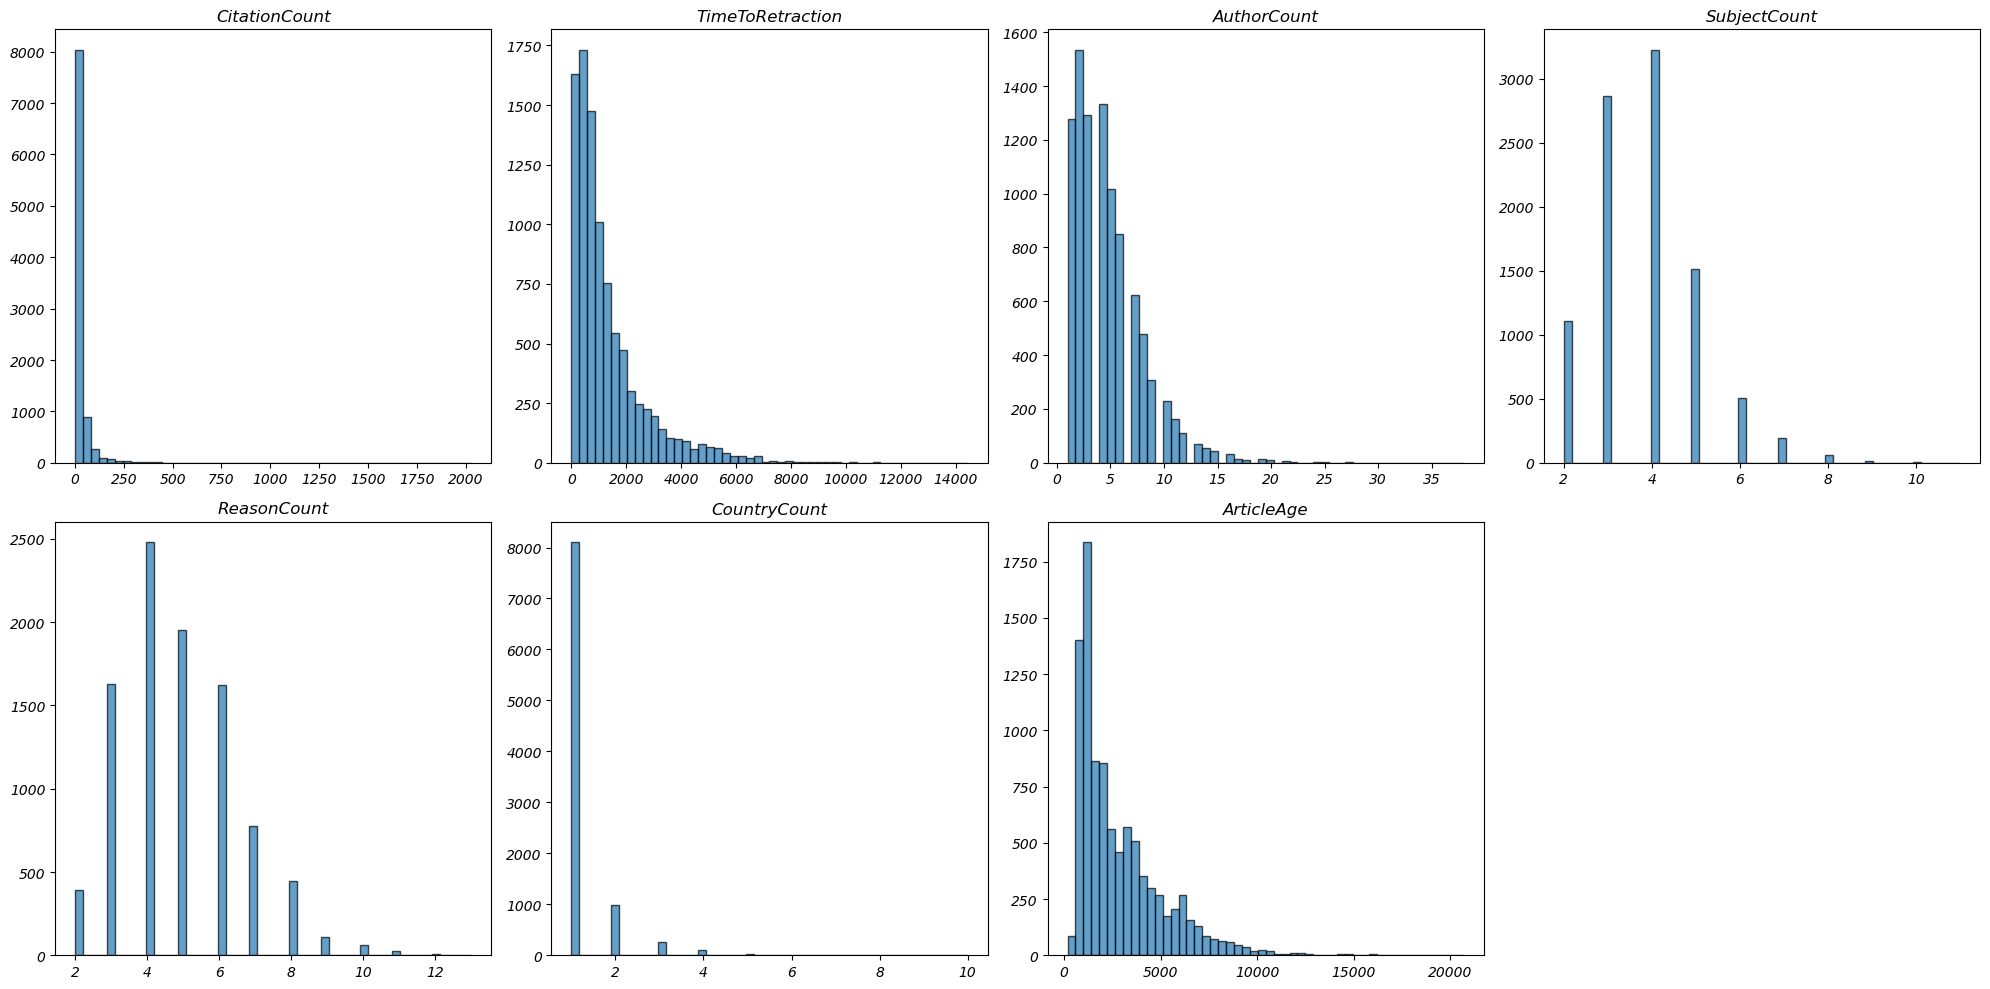

In [14]:
# Plot histograms for sample
plot_hist(continuous_features)

Most data aren't shaped like a normal distribution. But we shouldn't just depend on histograms to figure this out; it's important to run a normality test as well.

In [15]:
# Function to test normality
def normality_test(sample):
    # D'Agostino's K^2 test:
    for column in sample.columns:
        data = sample[column]
        k2, p = stats.normaltest(data)

        print('Column:', column)
        print('k2 =', k2)
        print('p =', p)

        # If p < 0.05, conclude that the data does not follow a normal distribution
        if p < 0.05:
            print('Data is not normally distributed.\n')
        else:
            print('Data is normally distributed.\n')

In [16]:
# Check if data of sample is normally distributed
normality_test(continuous_features)

Column: CitationCount
k2 = 17364.945533122267
p = 0.0
Data is not normally distributed.

Column: TimeToRetraction
k2 = 4537.86973099884
p = 0.0
Data is not normally distributed.

Column: AuthorCount
k2 = 3050.936729201415
p = 0.0
Data is not normally distributed.

Column: SubjectCount
k2 = 1012.0247910921128
p = 1.7442504339633286e-220
Data is not normally distributed.

Column: ReasonCount
k2 = 629.6836278997232
p = 1.8447500431049896e-137
Data is not normally distributed.

Column: CountryCount
k2 = 8180.3263805718325
p = 0.0
Data is not normally distributed.

Column: ArticleAge
k2 = 3354.719283531823
p = 0.0
Data is not normally distributed.



### Statistical Analysis

#### Inferential statistics

Given the substantial size of our data 35215, which is large enough (>30), a z-test should be performed to calculate the confidence interval.

In [22]:
# Function to calculate confidence interval of data from each column in a sample
def confidence_interval_z(samp):
    # Iterate over each column in the DataFrame
    for i in range(0, len(samp.columns)):
        # Select the current column
        sample = samp.iloc[:, i]
        column_name = samp.columns[i]  # Get column name

        # Sample mean, standard deviation, and sample size
        x_bar = sample.mean()
        s = sample.std()
        n = sample.shape[0]

        # Standard error
        std_err = s / math.sqrt(n)

        # Confidence level and significance level
        conf_lvl = 0.95  # we choose confidence level = 0.95
        sig_lvl = 1 - conf_lvl
        z_critical = stats.norm.ppf(1 - sig_lvl/2)  # z-critical value

        # Confidence interval with z-distribution
        ci_low_z = x_bar - z_critical * std_err
        ci_upp_z = x_bar + z_critical * std_err
        print(f"C.I. for column {column_name} (z*): {ci_low_z:.5f} to {ci_upp_z:.5f}. Interval size: {ci_upp_z - ci_low_z:.5f}.")

Confidence interval for the average value from data

In [23]:
confidence_interval_z(continuous_features)

C.I. for column CitationCount (z*): 22.71585 to 25.25233. Interval size: 2.53648.
C.I. for column TimeToRetraction (z*): 1294.24822 to 1350.16703. Interval size: 55.91882.
C.I. for column AuthorCount (z*): 4.60670 to 4.73871. Interval size: 0.13202.
C.I. for column SubjectCount (z*): 3.80207 to 3.85052. Interval size: 0.04846.
C.I. for column ReasonCount (z*): 4.80911 to 4.87486. Interval size: 0.06575.
C.I. for column CountryCount (z*): 1.19962 to 1.22406. Interval size: 0.02444.
C.I. for column ArticleAge (z*): 2827.27932 to 2917.92072. Interval size: 90.64140.


### Univariate analysis

In [24]:
# Function to find top n of value count in one column and visualise them
# columns_of_interest = ['Subject', 'Country', 'Author', 'ArticleType', 'Reason', 'Reason_group', 'Reason_group2']
def plot_top_n_value_counts(df, columns, n, title, x_label, bar_color='blue'):
    for column in columns:
        all_values = df[column].str.split(';').explode()

        # Drop values that are empty or null
        all_values = all_values[all_values != ''].dropna()
        
        # Split values for each column, count occurrences, and select the top n
        values_count = all_values.value_counts().head(n)
        
        # Print value counts
        print(f"Top {n} Counts for {column}:")
        print(values_count)
        print("\n")
        
        # Plotting
        plt.figure(figsize=(10, 8))
        ax = values_count.plot(kind='bar', color=bar_color, alpha=0.6)  # Apply specified color to the bars
        plt.title(title, fontsize=14, fontweight='bold')
        plt.xlabel(x_label)
        plt.ylabel('Number of Retractions')  # Set y-axis label to 'Retractions'
        
        plt.xticks(rotation=45, ha="right")
        
        # Adding the count above each bar
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
        plt.tight_layout()
        plt.show()

In [25]:
# Function to plot pie charts
def plot_pie_chart(df, columns, n, title, cmap_name='tab20'):
    for column in columns:
        all_values = df[column].str.split(';').explode()

        # Drop values that are empty or null
        all_values = all_values[all_values != ''].dropna()
        
        # Count occurrences of each value
        values_count = all_values.value_counts()
        
        # If there are more than n categories, sum the smallest ones into 'Others'
        if len(values_count) > n:
            others_sum = values_count.iloc[n:].sum()
            values_count = values_count.iloc[:n]
            values_count['Others'] = others_sum

        # Get the colormap
        cmap = plt.get_cmap(cmap_name)
        colors = cmap(range(len(values_count)))
        
        # Plotting as a pie chart
        plt.figure(figsize=(10, 8))
        values_count.plot.pie(autopct='%1.1f%%', startangle=140, labels=values_count.index, colors=colors)
        plt.title(title, fontsize=14, fontweight='bold')
        plt.ylabel('')  # Hide the y-label
        
        plt.tight_layout()
        plt.show()

#### Value counts of feature 'Subject'

Top 5 Counts for Subject:
Subject
(BLS) Biology - Cellular    3305
(BLS) Genetics              2043
(BLS) Biology - Cancer      1934
(B/T) Computer Science      1855
(BLS) Biochemistry          1771
Name: count, dtype: int64




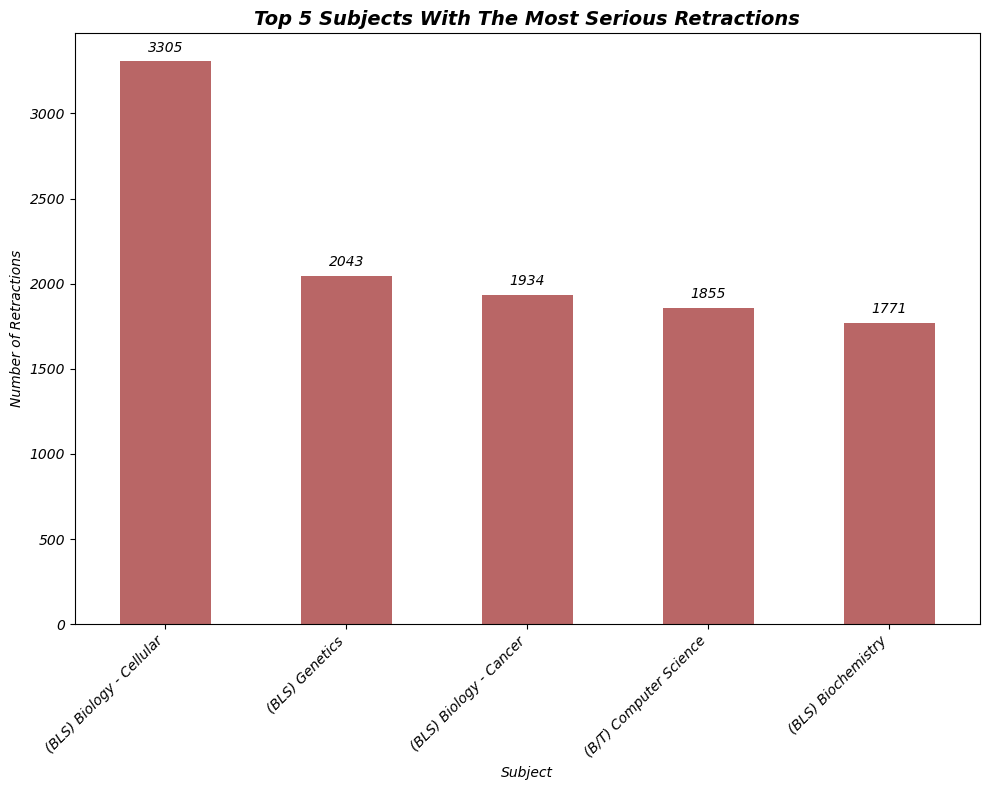

In [26]:
# Call the function to plot only the top 5 counts
plot_top_n_value_counts(df, df[['Subject']], 5, "Top 5 Subjects With The Most Serious Retractions", "Subject", 'darkred')

Biology, Genetics, Biochemistry and Technology are the subjects that have the most serious retractions.

#### Value counts of feature 'Country'

Top 4 Counts for Country:
Country
China            4914
United States    1381
India            1350
Japan             496
Name: count, dtype: int64




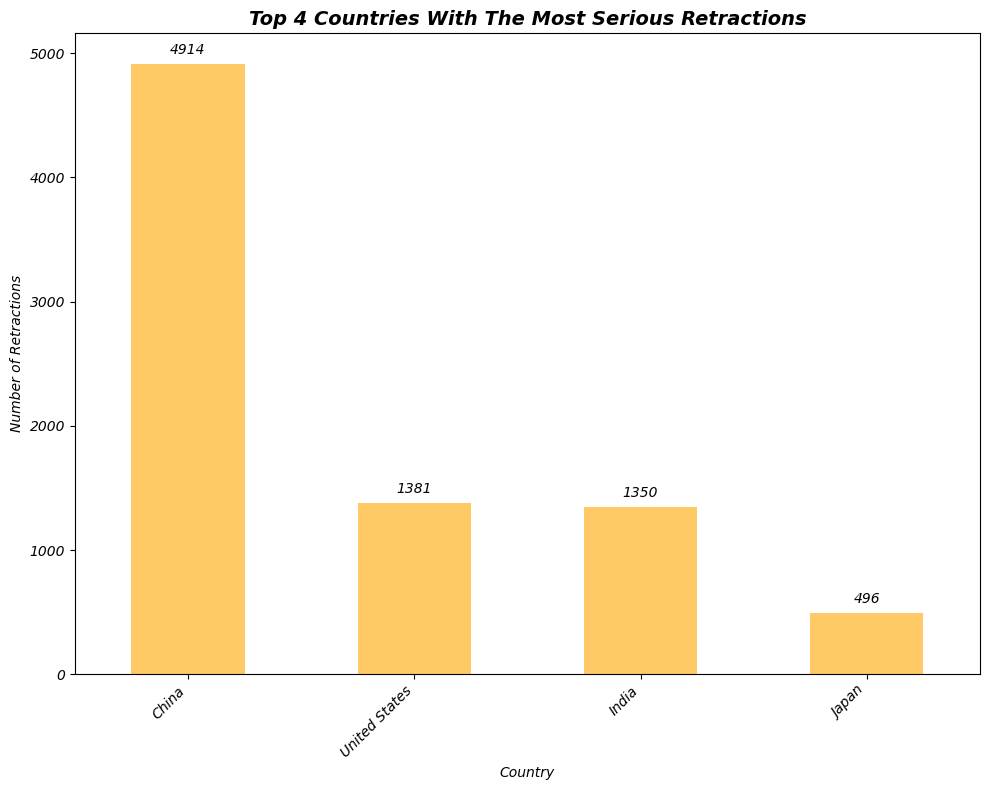

In [27]:
# Call the function to plot only the top 4 counts
plot_top_n_value_counts(df, df[['Country']],4, "Top 4 Countries With The Most Serious Retractions", "Country", 'orange')

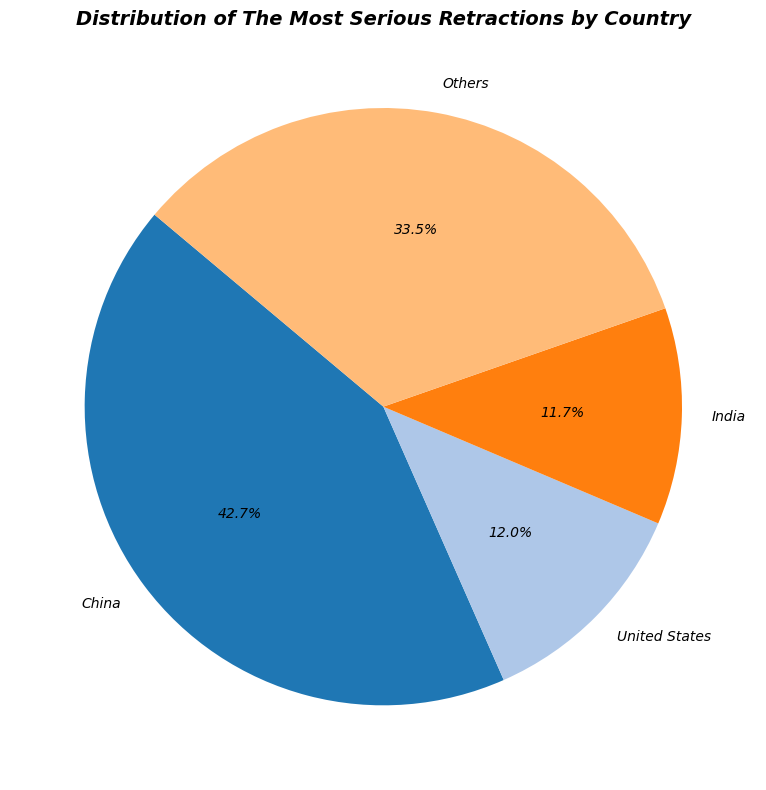

In [28]:
plot_pie_chart(df, df[['Country']], 3, 'Distribution of The Most Serious Retractions by Country')

The majority of the most serious retractions are from China, which accounts for 42.7% with 4914 retractions.

#### Value counts of feature 'Author'

Top 10 Counts for Author:
Author
Yoshitaka Fujii      133
Hironobu Ueshima      97
Hidenori Toyooka      84
Hiroshi Otake         80
Hiroyoshi Tanaka      75
Diederik A Stapel     53
Fazlul H Sarkar       41
Hua Zhong             41
Adrian Maxim          37
Tao Liu               36
Name: count, dtype: int64




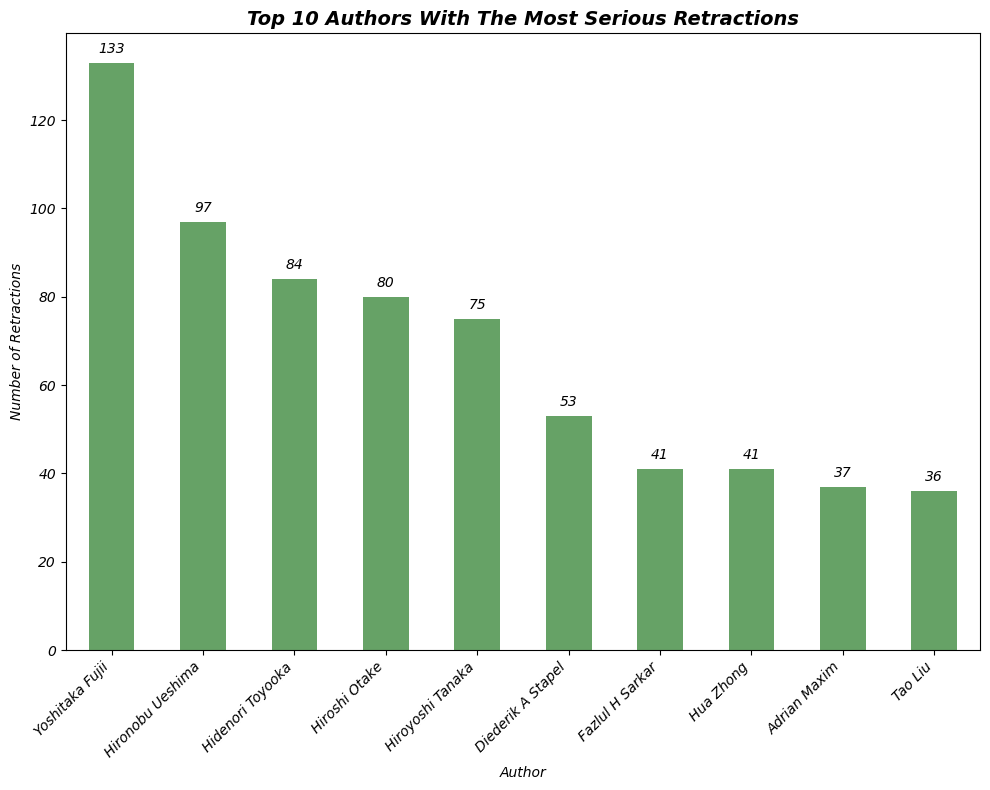

In [29]:
# Call the function to plot only the top 10 counts
plot_top_n_value_counts(df, df[['Author']], 10, "Top 10 Authors With The Most Serious Retractions", "Author", 'darkgreen')

Japanese and Chinese authors have the most serious retractions.

#### Value counts of feature 'Institution'

Top 4 Counts for Institution:
Institution
Department of Anesthesiology, Showa University Hospital, Tokyo, Japan                                                                                                   81
 Department of Botany and Microbiology, College of Science, King Saud University, Riyadh, Saudi Arabia                                                                  32
College of Chemistry and Chemical Engineering, Provincial Key Laboratory of Coordination Chemistry, Jinggangshan University, Jian 343009, People's Republic of China    27
College of Engineering, Jinggangshan University, Jian 343009, People's Republic of China                                                                                25
Name: count, dtype: int64




C:\Users\Admin\AppData\Local\Temp\ipykernel_25132\2887416471.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


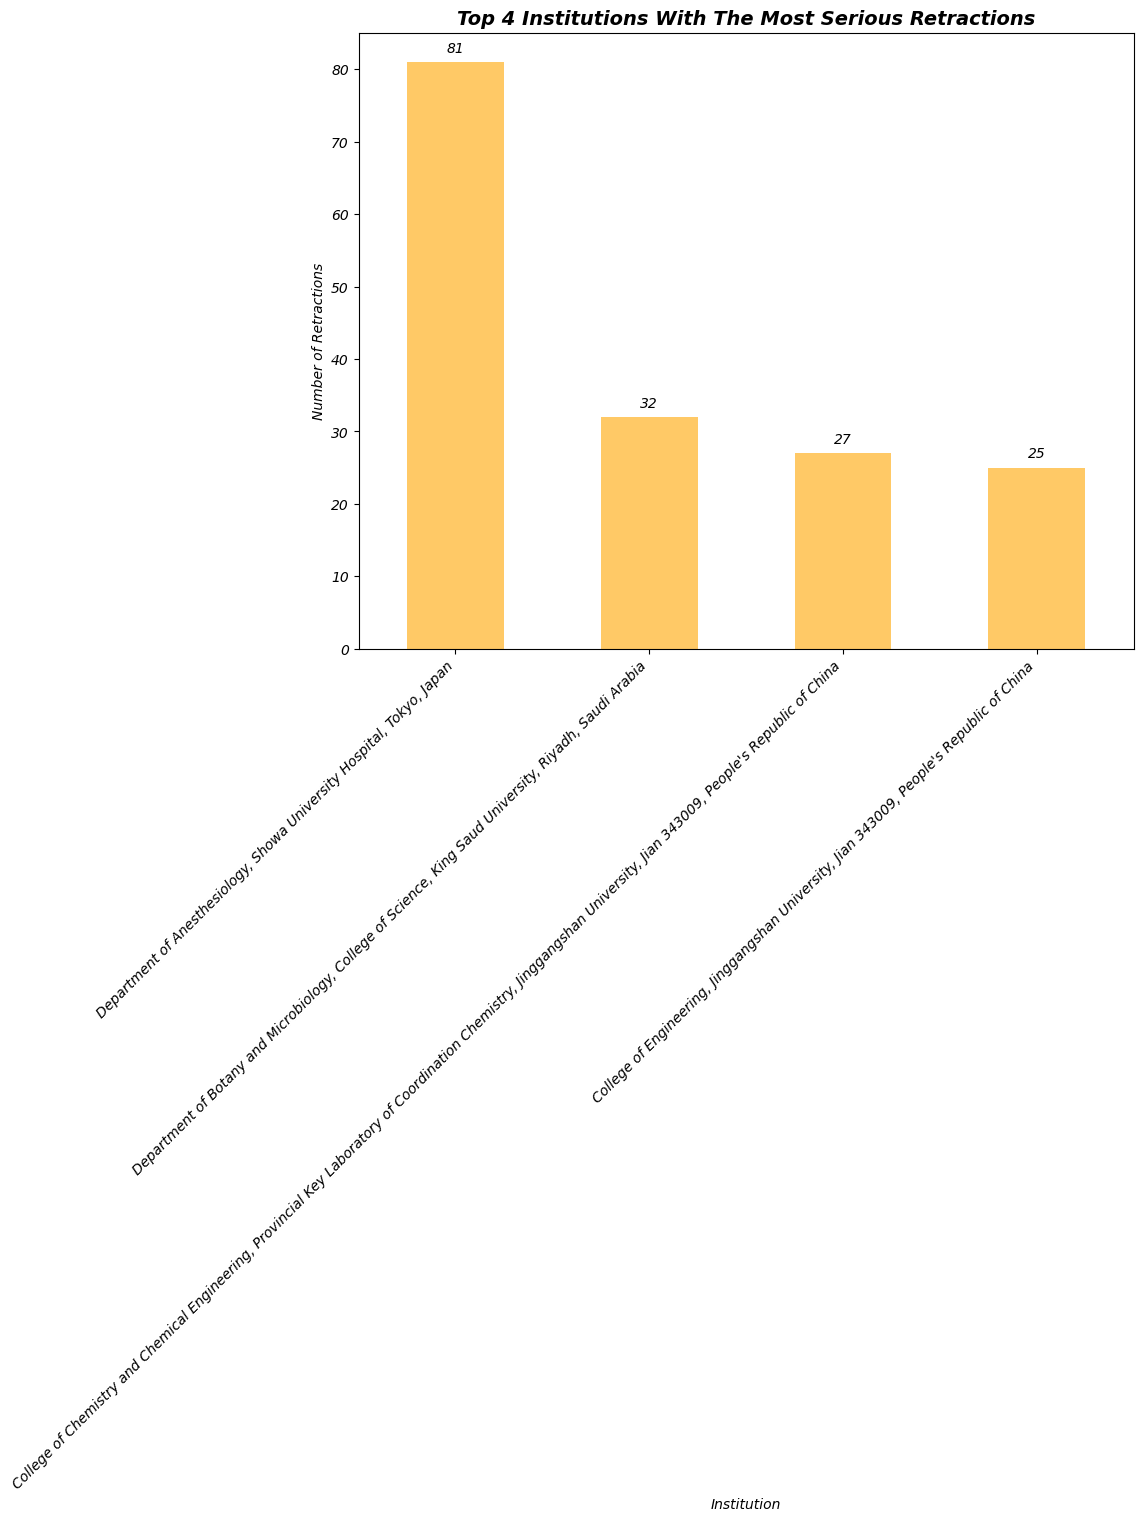

In [30]:
# Call the function to plot only the top 4 counts
plot_top_n_value_counts(df, df[['Institution']], 4, "Top 4 Institutions With The Most Serious Retractions", "Institution", 'orange')

The institution that has the most serious retractions: Department of Anesthesiology, Showa University Hospital, Tokyo, Japan

#### Value counts of feature 'Journal'

Top 6 Counts for Journal:
Journal
Journal of Physics: Conference Series                                                       732
PLoS One                                                                                    429
Journal of Ambient Intelligence and Humanized Computing                                     428
Arabian Journal of Geosciences                                                              363
ICIMTECH 21: The Sixth International Conference on Information Management and Technology    323
The Journal of Biological Chemistry                                                         192
Name: count, dtype: int64




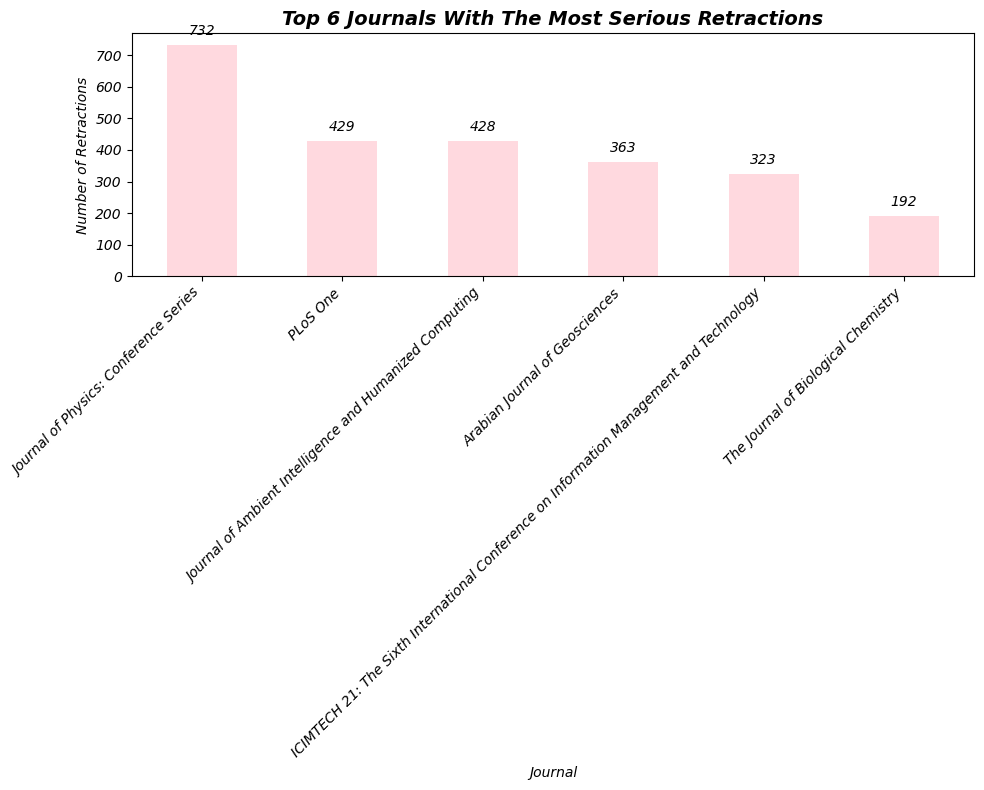

In [31]:
# Call the function to plot only the top 6 counts
plot_top_n_value_counts(df, df[['Journal']], 6, "Top 6 Journals With The Most Serious Retractions", "Journal", 'pink')

These are the journals that have the most serious retractions: 
- Journal of Physic: Conference Series
- PLoS One
- Journal of Ambient Intelligence and Humanized Computing
- Arabian Journal of Geosciences
- ICIMTECH 21: The Sixth International Conference on Information Management and Technology.

#### Value counts of feature 'Publisher'

Top 5 Counts for Publisher:
Publisher
Springer                              1808
Elsevier                              1072
IOP Publishing                         752
Wiley                                  649
Springer - Nature Publishing Group     578
Name: count, dtype: int64




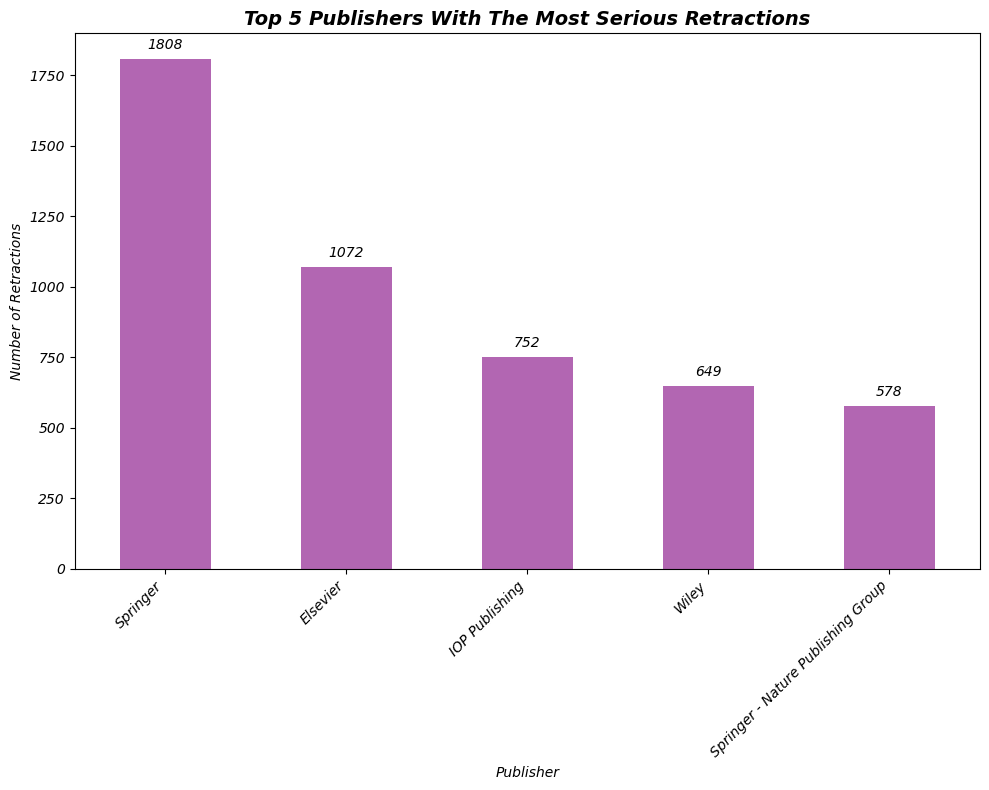

In [32]:
# Call the function to plot only the top 5 counts
plot_top_n_value_counts(df, df[['Publisher']], 5, "Top 5 Publishers With The Most Serious Retractions", "Publisher", 'purple')

Springer and Springer have the most serious retractions.

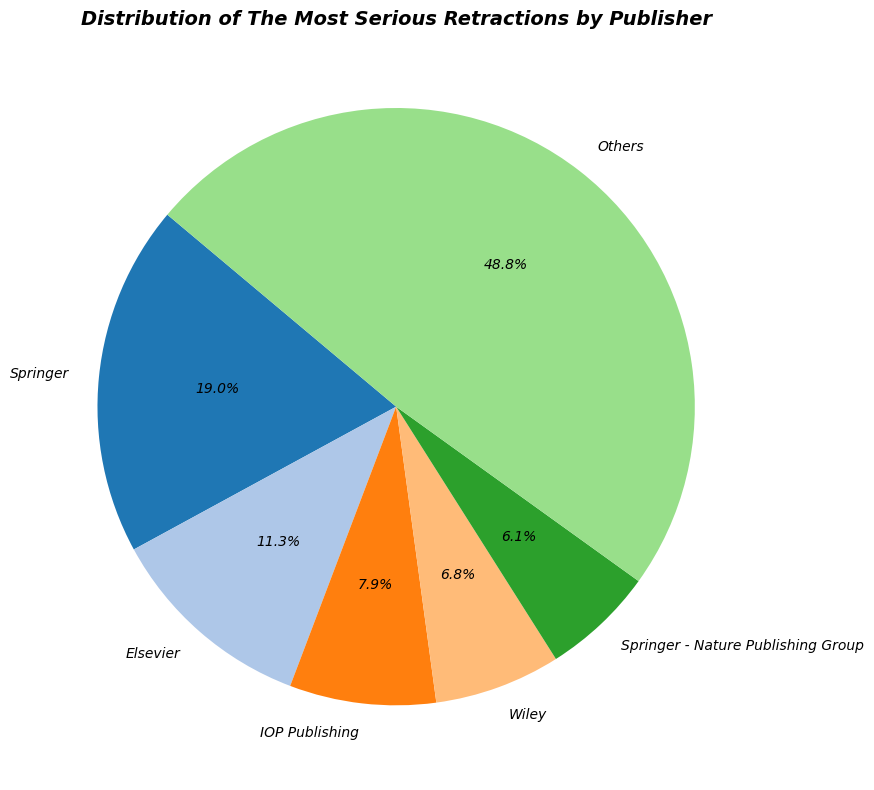

In [33]:
plot_pie_chart(df, df[['Publisher']], 5, 'Distribution of The Most Serious Retractions by Publisher')

#### Value counts of feature 'ArticleType'

Top 4 Counts for ArticleType:
ArticleType
Research Article             7655
Conference Abstract/Paper    1167
Clinical Study                391
Article in Press              135
Name: count, dtype: int64




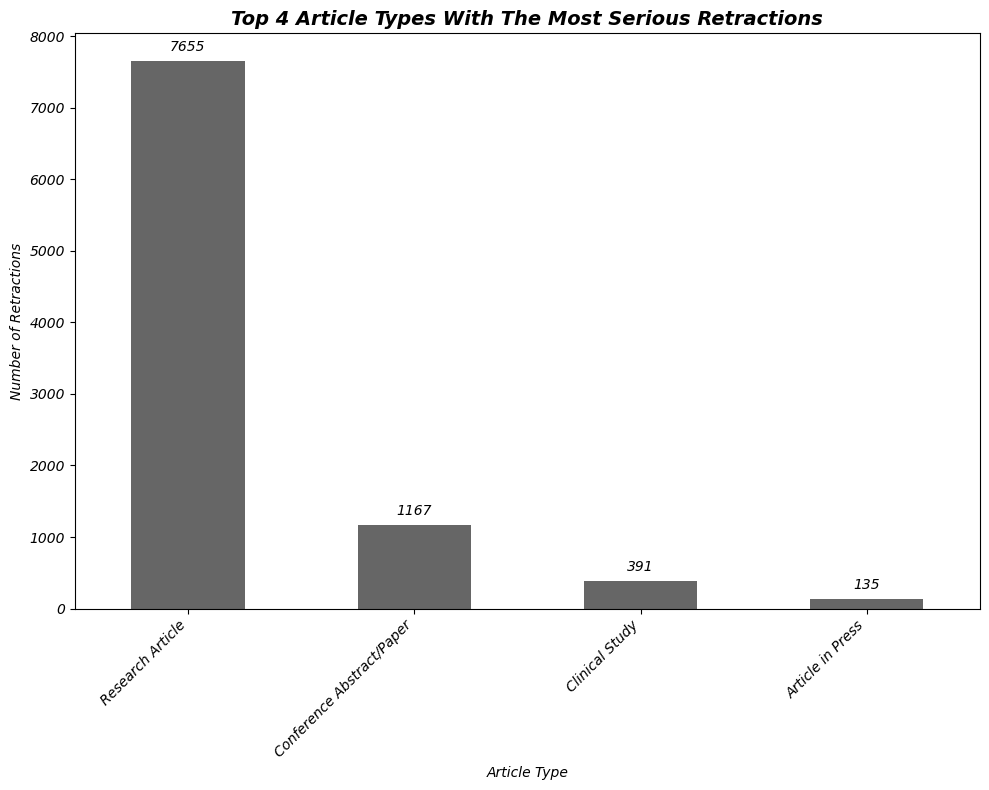

In [34]:
# Call the function to plot only the top 4 counts
plot_top_n_value_counts(df, df[['ArticleType']], 4, "Top 4 Article Types With The Most Serious Retractions", "Article Type", 'black')

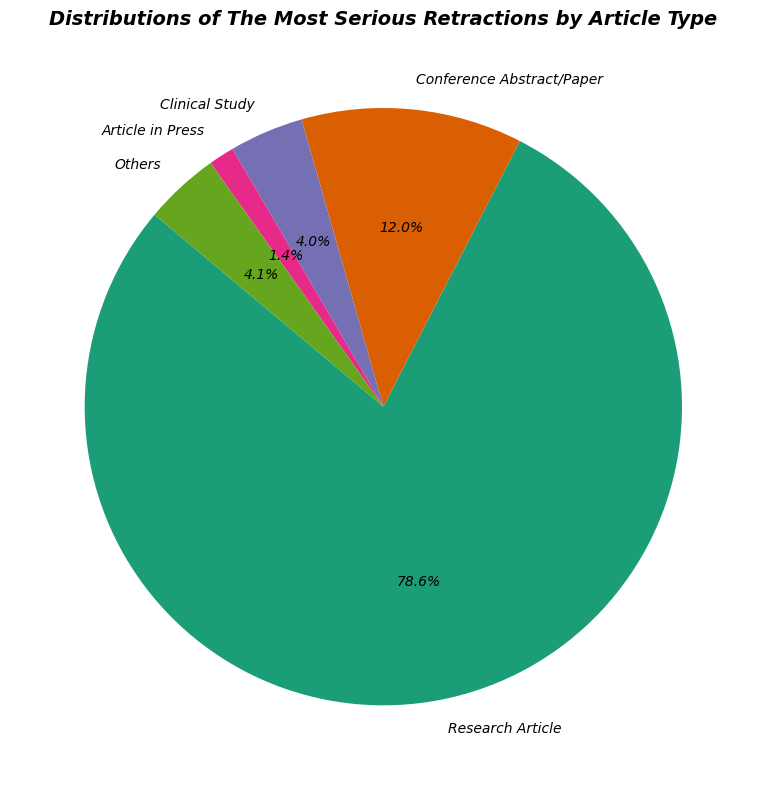

In [35]:
plot_pie_chart(df, df[['ArticleType']], 4, 'Distributions of The Most Serious Retractions by Article Type', 'Dark2')

The most serious retractions are reseach articles with 78.6%, which is 7655 retractions.

#### Value counts of feature 'IsPaywalled'

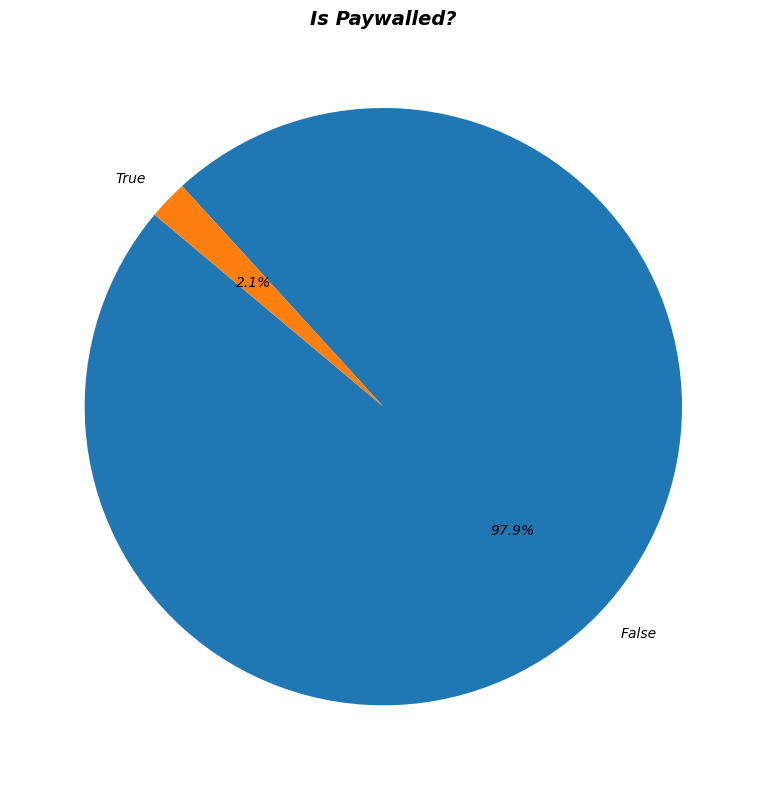

In [36]:
# Function to plot pie charts
def plot_pie_chart_2(df, columns, n, title, cmap_name='tab20'):
    for column in columns:
        all_values = df[column]
        
        # Count occurrences of each value
        values_count = all_values.value_counts()

        # Get the colormap
        cmap = plt.get_cmap(cmap_name)
        colors = cmap(range(len(values_count)))
        
        # Plotting as a pie chart
        plt.figure(figsize=(10, 8))
        values_count.plot.pie(autopct='%1.1f%%', startangle=140, labels=values_count.index, colors=colors)
        plt.title(title, fontsize=14, fontweight='bold')
        plt.ylabel('')  # Hide the y-label
        
        plt.tight_layout()
        plt.show()
        
plot_pie_chart_2(df, df[['IsPaywalled']], 2, 'Is Paywalled?', cmap_name='tab10')

#### Value counts of feature 'IsInternationalCollaboration'

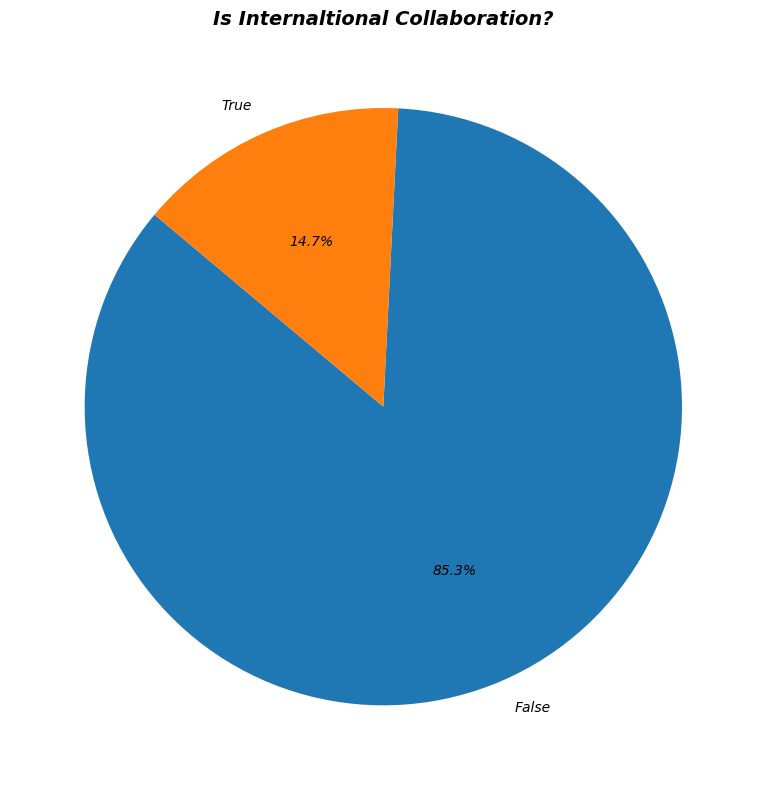

In [37]:
plot_pie_chart_2(df, df[['IsInternationalCollaboration']], 2, 'Is Internaltional Collaboration?', cmap_name='tab10')

85.3% of the most serious retractions are not internaltion collaboration, which means if a research paper is produced by multiple countries, it is less likey to be retracted.

#### Value counts of feature 'Reason'

Top 10 Counts for Reason:
Reason
Investigation by Journal/Publisher      4223
Fake Peer Review                        4210
Duplication of Image                    2544
Unreliable Results                      2151
Rogue Editor                            1436
Investigation by Company/Institution    1434
Falsification/Fabrication of Data       1415
Investigation by Third Party            1402
Paper Mill                              1386
Concerns/Issues About Data              1326
Name: count, dtype: int64




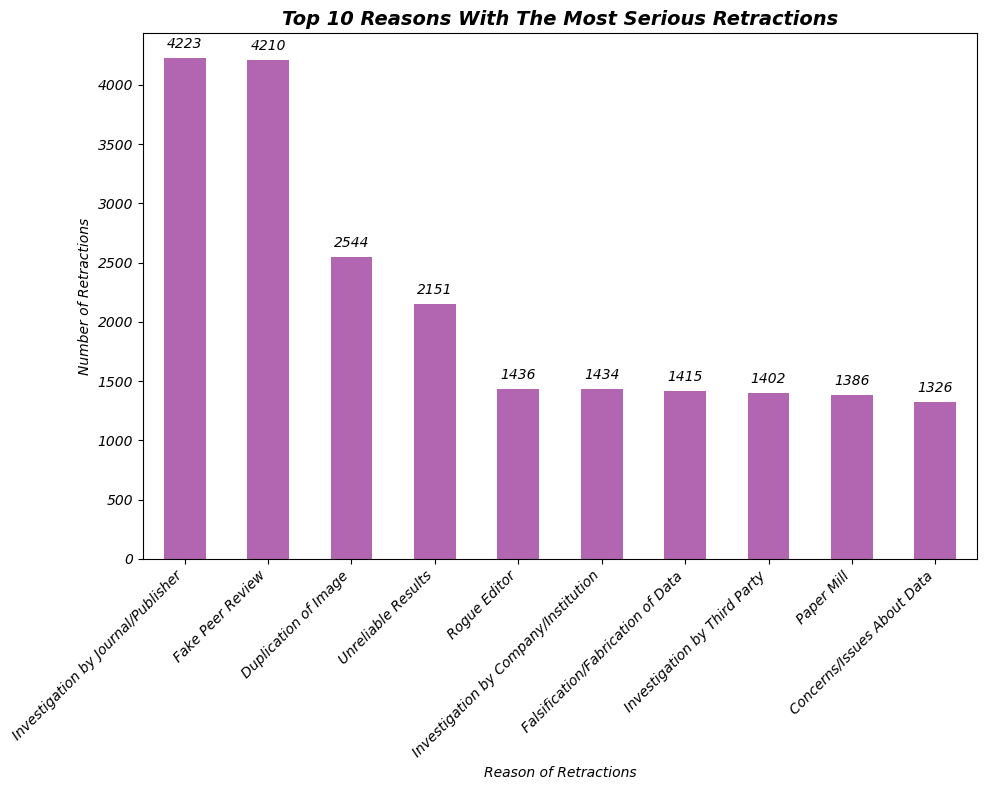

In [38]:
# Call the function to plot only the top 10 counts
plot_top_n_value_counts(df, df[['Reason']], 10, "Top 10 Reasons With The Most Serious Retractions", "Reason of Retractions", 'purple')

The most common reasons for the most serious retractions are: Investigation by Journal/Publisher and Fake Peer Review. Therefore, implementing more transparent peer review processes, and using technological tools to detect fraud can help maintain the integrity of scientific publications.

### Multivariate analysis

#### Trends Over Time

In [39]:
# Function to plot a line graph showing top values of a feature over time
def plot_top_values_over_time(df, column, n, start_year, title, legend):
    # Ensure 'RetractionYear' is extracted
    df['RetractionYear'] = df['RetractionDate'].dt.year

    # Split and explode the specified column to handle multiple values per row
    df_exploded = df.assign(SplitColumn=df[column].str.split(';')).explode('SplitColumn')

    # Drop rows where the column is empty or null
    df_exploded = df_exploded[df_exploded['SplitColumn'].notna() & (df_exploded['SplitColumn'] != '')]

    # Count occurrences of each value per year
    values_over_time = df_exploded.groupby(['RetractionYear', 'SplitColumn']).size().reset_index(name='Count')

    # Find top n values overall based on total counts
    top_values = df_exploded['SplitColumn'].value_counts().head(n).index

    # Filter values_over_time for only top values
    values_over_time_top_n = values_over_time[values_over_time['SplitColumn'].isin(top_values)]

    # Pivot for visualization
    pivot_df = values_over_time_top_n.pivot(index='RetractionYear', columns='SplitColumn', values='Count').fillna(0)

    # Plot
    plt.figure(figsize=(12, 8))
    for value in top_values:
        if value in pivot_df.columns:  # Ensure value exists in columns
            plt.plot(pivot_df.index, pivot_df[value], marker='o', label=value)

    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Retrations', fontsize=12)
    plt.legend(title=legend)
    plt.xticks(pivot_df.index, labels=[int(year) for year in pivot_df.index], rotation=0)  # Set x-ticks as integers
    plt.xlim(start_year, pivot_df.index.max())
    plt.tight_layout()
    plt.show()

##### Trend of Reasons Over Time

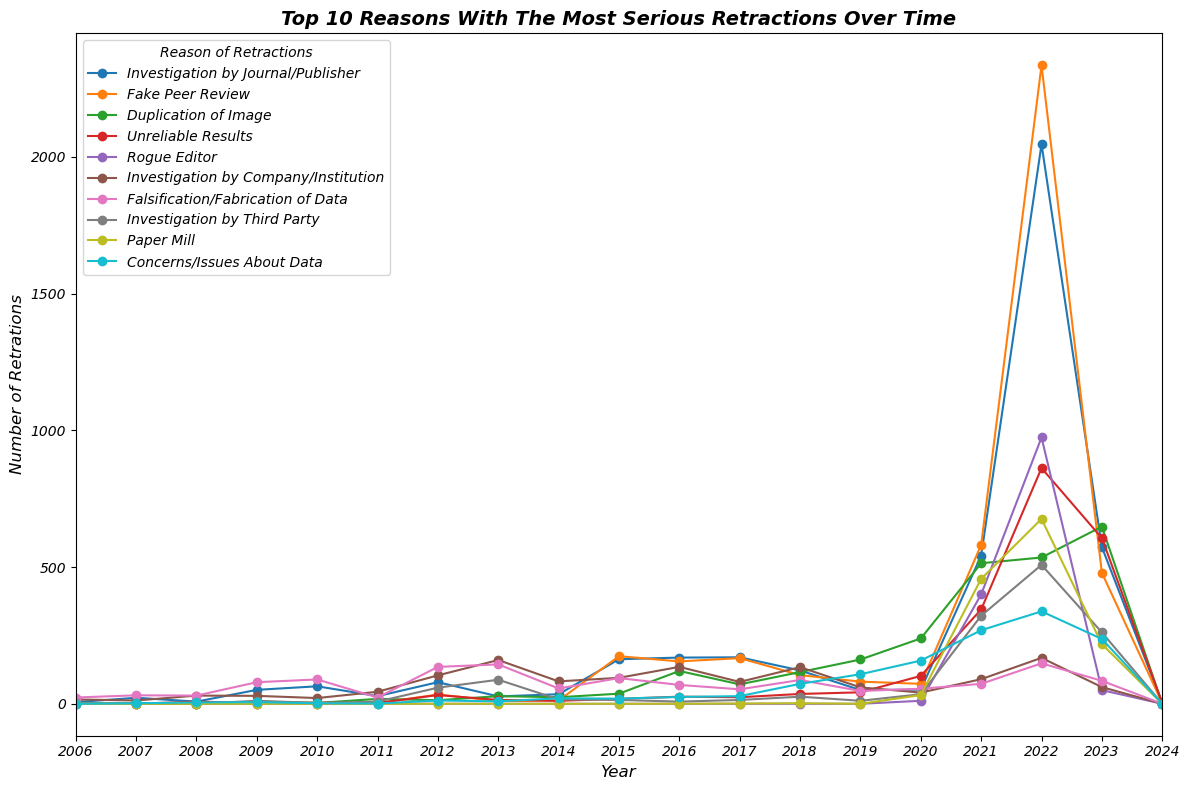

In [40]:
plot_top_values_over_time(df, 'Reason', 10, 2006, 'Top 10 Reasons With The Most Serious Retractions Over Time', "Reason of Retractions")

In the past (2008-2012):
In recent years (2020-2024):

##### Trend of Subjects Over Time

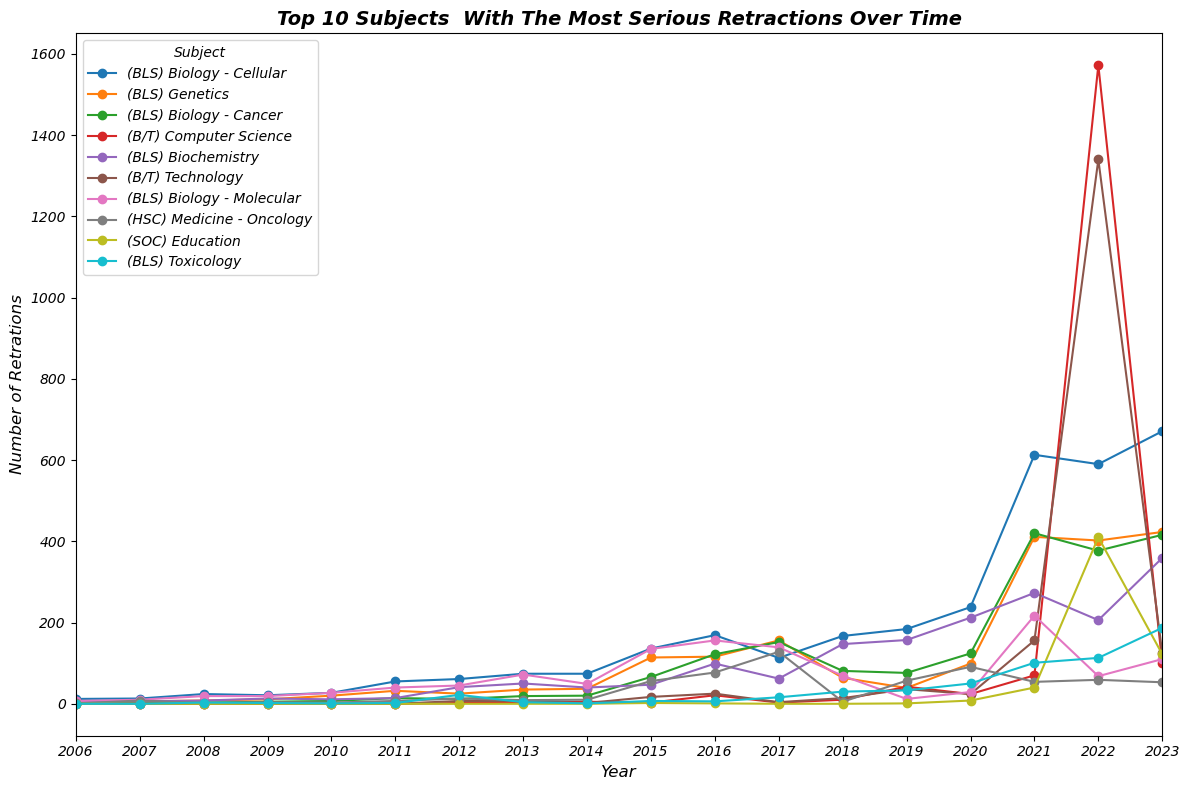

In [41]:
plot_top_values_over_time(df, 'Subject', 10, 2006, 'Top 10 Subjects  With The Most Serious Retractions Over Time', "Subject")

In 2022, Computer Science and Technology have a big number of the most serious retractions, while retractions of other subjects are slightly increasing.

##### Trend of Countries Over Time

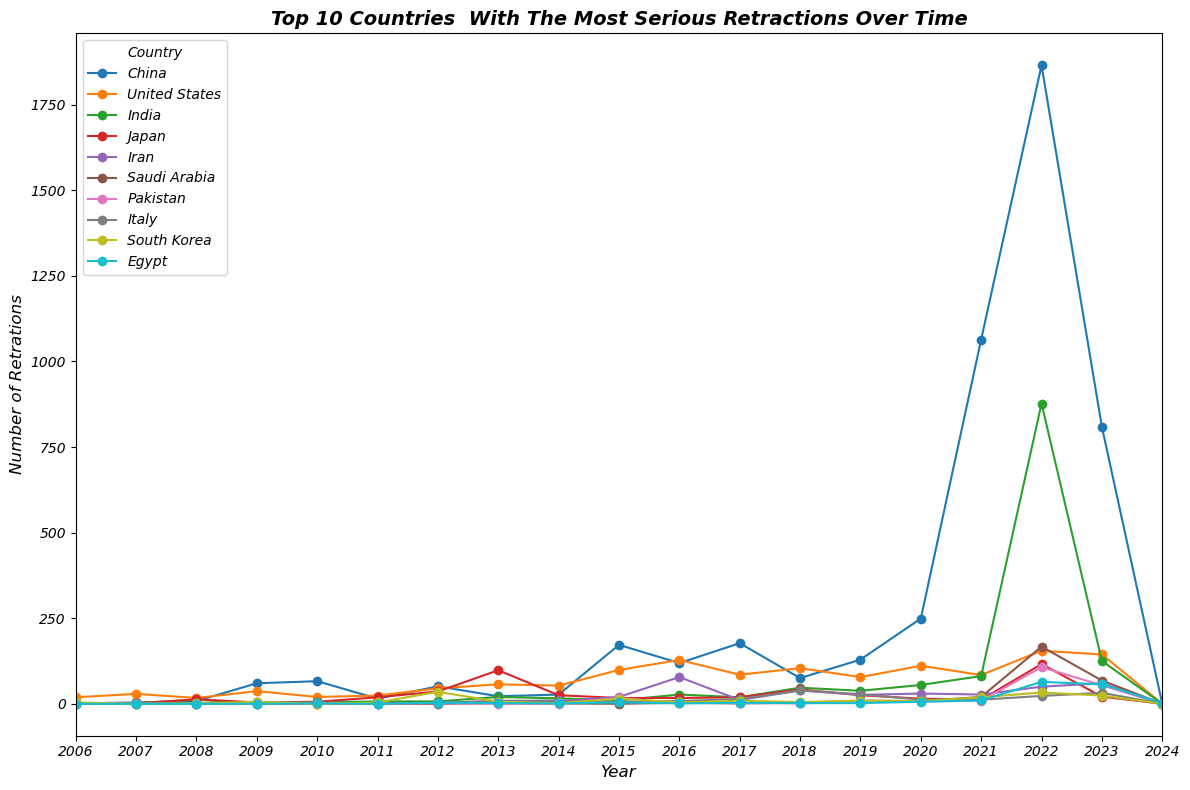

In [42]:
plot_top_values_over_time(df, 'Country', 10, 2006, 'Top 10 Countries  With The Most Serious Retractions Over Time', "Country")

China has the most serious retractions in recent years, followed by India.

##### Trend of Authors Over Time

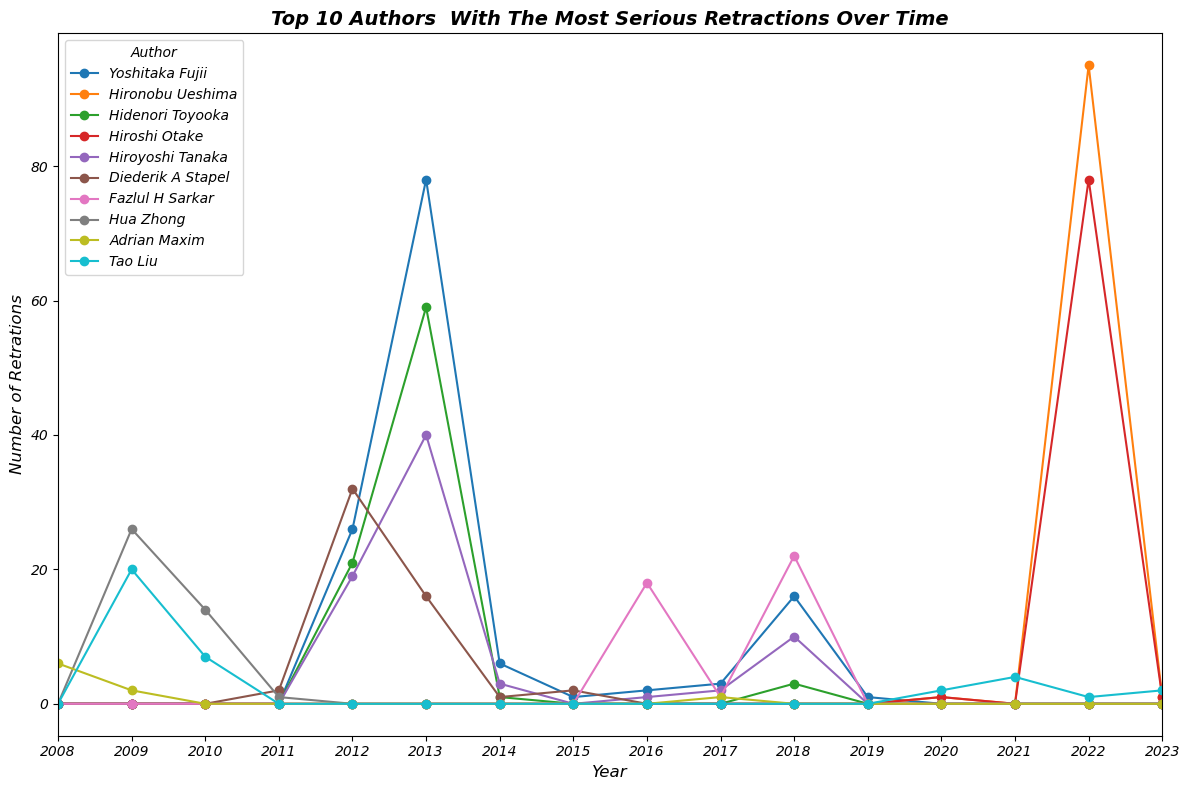

In [43]:
plot_top_values_over_time(df, 'Author', 10, 2008, 'Top 10 Authors  With The Most Serious Retractions Over Time', "Author")

##### Trend of Article Types Over Time

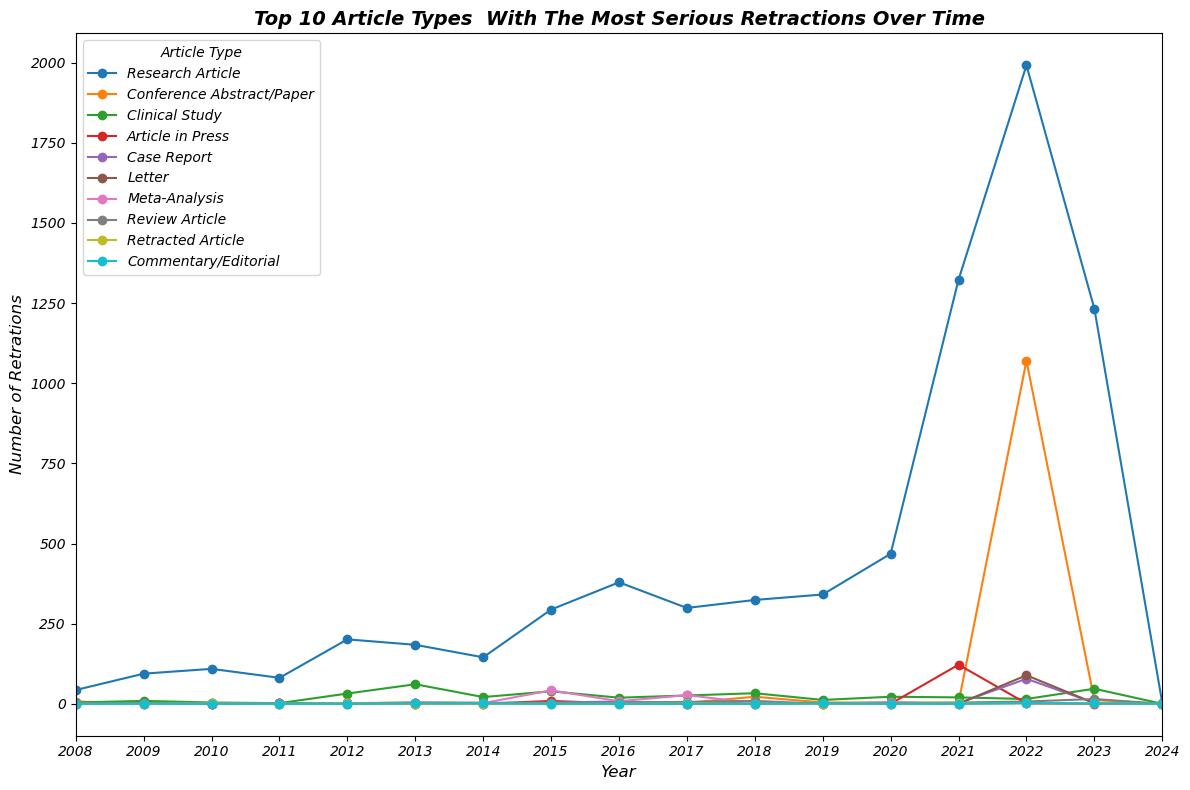

In [44]:
plot_top_values_over_time(df, 'ArticleType', 10, 2008, 'Top 10 Article Types  With The Most Serious Retractions Over Time', "Article Type")

Research Article has the most serious retractions in recent years, followed by Conference Abstract/Paper.

##### Trend of Level of Seriousness Over Time

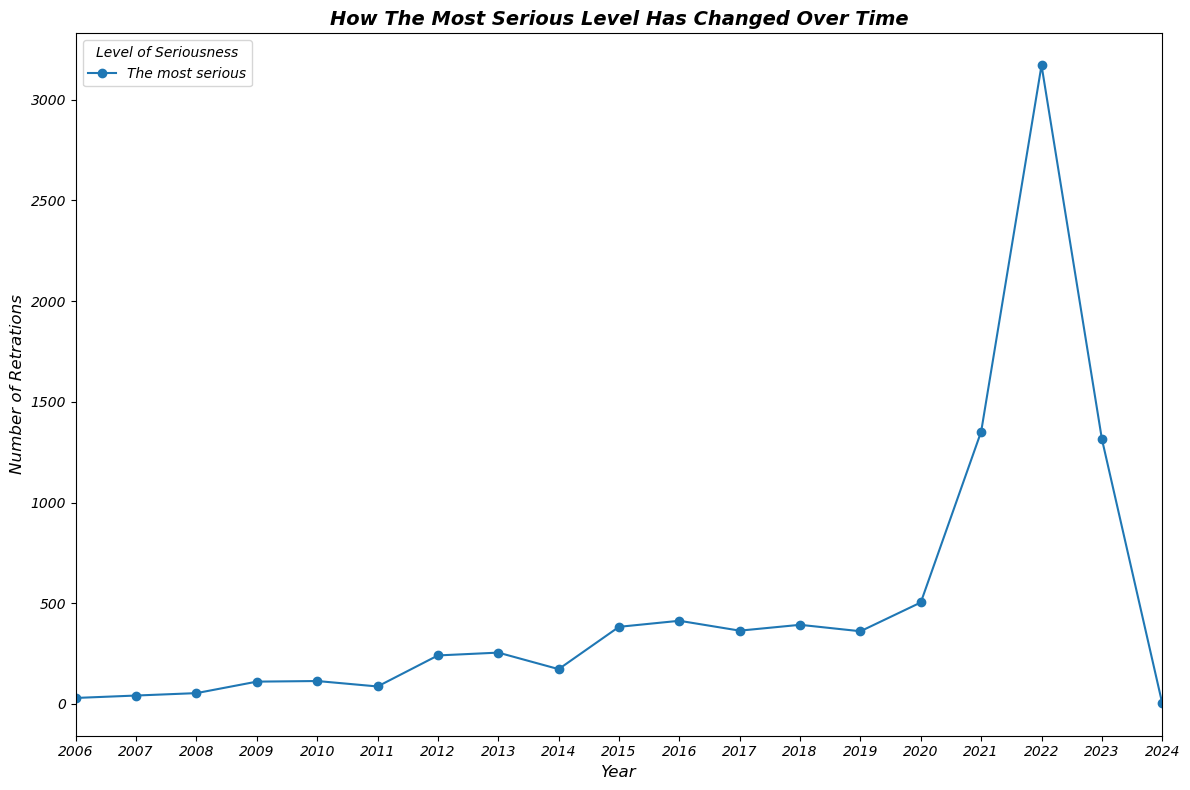

In [45]:
plot_top_values_over_time(df, 'LevelOfSeriousness', 4, 2006, 'How The Most Serious Level Has Changed Over Time', "Level of Seriousness")